In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#loading libraries

import os
import gc
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

from keras import losses
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential 
from keras.optimizers import Adam
from keras import optimizers
from keras import backend as K
from keras.callbacks import Callback
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers


import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import tensorflow as tf
import pickle

from pylab import rcParams

Using TensorFlow backend.


In [2]:
#Loading train data
train=pd.read_csv("../input/train.csv")

Data Exploration

In [3]:
#Data
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [4]:
#Shape of data
train.shape

(59381, 128)

In [5]:
#Exploring missing values
train.isnull().sum()[train.isnull().sum() !=0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

,features,missing_count,missing_count_percentage
0,Employment_Info_1,19,0.031997
1,Employment_Info_4,6779,11.416110
2,Employment_Info_6,10854,18.278574
3,Insurance_History_5,25396,42.767889
4,Family_Hist_2,28656,48.257860
5,Family_Hist_3,34241,57.663226
6,Family_Hist_4,19184,32.306630
7,Family_Hist_5,41811,70.411411
8,Medical_History_1,8889,14.969435
9,Medical_History_10,58824,99.061990


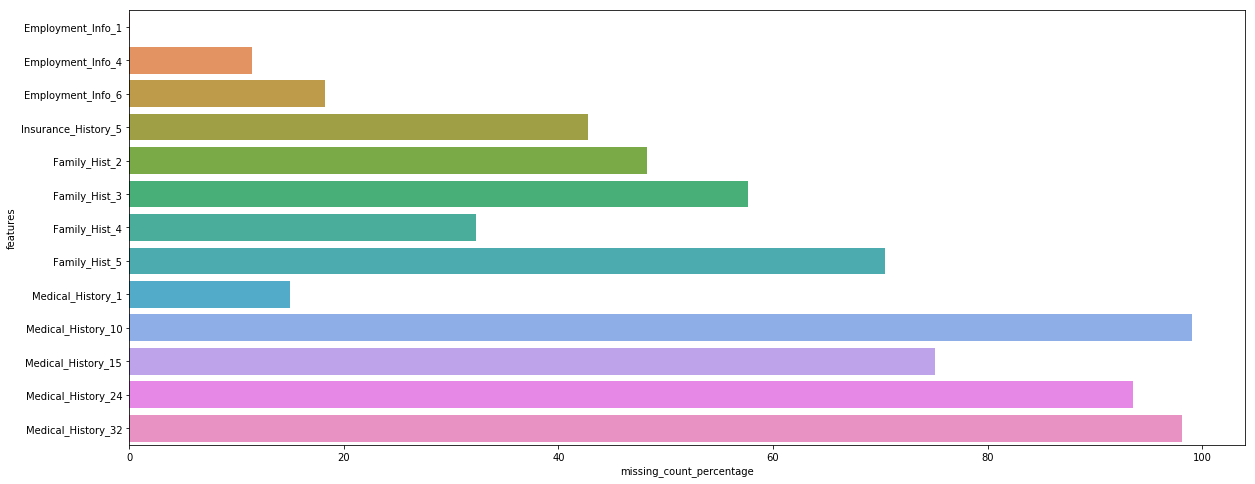

In [6]:
#Exploring missing values
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/59381)*100
plt.figure(figsize=(20,8))
sns.barplot(y=train_missing['features'],x=train_missing['missing_count_percentage'])
train_missing

In [7]:
#checking data types
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
#Outliers detection
train.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,0.001733,1.901989,2.048484,2.419360,2.686230,0.474550,0.497737,0.444890,0.484635,7.962172,253.987100,2.102171,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.066587,0.006837,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,0.082347,4.227082,0.715034,0.032816,0.350033,0.349551,0.417939,0.085858,2.674536,0.320627,0.231566,0.491688,0.274915,0.445195,0.329328,0.989139,0.945739,0.007338,0.971223,0.755149,0.509577,0.483159,0.154959,0.140187,0.163012,0.129200,13.027697,178.621154,0.303098,...,0.187432,0.233774,0.099515,0.076981,0.088239,0.392671,0.112040,0.095275,0.086244,0.095967,0.089821,0.119949,0.189172,0.297013,0.136155,0.285404,0.115145,0.108237,0.121304,0.107780,0.156253,0.103813,0.143947,0.149380,0.142198,0.083007,0.101485,0.249307,0.082405,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.

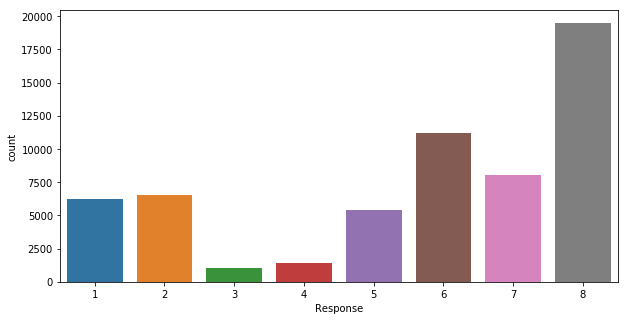

In [9]:
#Responce variable
aixs1 = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x='Response',data=train)

Data PreProcessing

In [10]:
#Categorical codes
train['Product_Info_2'] = train['Product_Info_2'].astype('category').cat.codes

Missing Value Treatment

In [11]:
# missing values
train_missing

,features,missing_count,missing_count_percentage
0,Employment_Info_1,19,0.031997
1,Employment_Info_4,6779,11.416110
2,Employment_Info_6,10854,18.278574
3,Insurance_History_5,25396,42.767889
4,Family_Hist_2,28656,48.257860
5,Family_Hist_3,34241,57.663226
6,Family_Hist_4,19184,32.306630
7,Family_Hist_5,41811,70.411411
8,Medical_History_1,8889,14.969435
9,Medical_History_10,58824,99.061990


In [12]:
#dropping columns containing missing values more than 80%
train = train.drop(['Medical_History_10','Medical_History_24','Medical_History_32'], axis=1)

In [13]:
#missing values AGAIN
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/59381)*100
train_missing

,features,missing_count,missing_count_percentage
0,Employment_Info_1,19,0.031997
1,Employment_Info_4,6779,11.416110
2,Employment_Info_6,10854,18.278574
3,Insurance_History_5,25396,42.767889
4,Family_Hist_2,28656,48.257860
5,Family_Hist_3,34241,57.663226
6,Family_Hist_4,19184,32.306630
7,Family_Hist_5,41811,70.411411
8,Medical_History_1,8889,14.969435
9,Medical_History_15,44596,75.101463


In [14]:
#Mean Imputation fro continous variables
Continuos = ['Employment_Info_1','Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
                    'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5']
train[Continuos] = train[Continuos].fillna(train[Continuos].mean())

In [15]:
#Mode Imputation fro continous variables
Categorical = ['Medical_History_1', 'Medical_History_15']
train[Categorical] = train[Categorical].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [16]:
#Missing values again
train_missing= train.isnull().sum()[train.isnull().sum() !=0]
train_missing=pd.DataFrame(train_missing.reset_index())
train_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
train_missing['missing_count_percentage']=((train_missing['missing_count'])/59381)*100
train_missing

,features,missing_count,missing_count_percentage


In [17]:
#train data
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,0.474550,0.598039,0.444890,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,0.497737,0.084507,0.484635,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.304348,0.497737,0.225352,0.484635,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.420290,0.497737,0.352113,0.484635,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,0.001733,3,2,3,2,0.463768,0.497737,0.408451,0.484635,1.0,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


Modelling

1)Dataset split

In [18]:
#Dataset split
train_data, test_data = train_test_split(train, test_size = 0.15)
print(train_data.shape)
print(test_data.shape)

(50473, 125)
(8908, 125)


In [19]:
#traindata
train_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
37724,50086,1,15,26,0.179487,2,1,1,0.582090,0.672727,0.261506,0.455416,0.100,9,1,0.0,2,0.500000,1,2,2,3,1,2,1,1,1,3,1,0.001000,1,1,2,2,0.474550,0.401961,0.444890,0.339286,1.0,478,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
33550,44541,1,14,26,0.487179,2,3,1,0.477612,0.745455,0.236402,0.344016,0.100,11,1,0.0,2,0.500000,1,2,6,3,1,1,1,2,3,1,3,0.001733,3,2,3,2,0.565217,0.497737,0.535211,0.484635,1.0,112,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
31838,42260,1,16,26,0.076923,2,3,1,0.522388,0.563636,0.236402,0.533794,0.080,9,1,0.0,2,0.020000,2,2,8,3,1,1,1,2,1,3,1,0.000900,1,3,2,3,0.474550,0.539216,0.444890,0.580357,3.0,112,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
8351,11130,1,16,26,0.230769,2,3,1,0.507463,0.781818,0.497908,0.715829,0.085,14,1,0.0,2,0.361469,1,2,11,3,1,1,1,1,1,3,1,0.003333,1,1,2,3,0.474550,0.382353,0.563380,0.484635,3.0,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5
36028,47841,1,15,26,0.076923,2,3,1,0.447761,0.800000,0.309623,0.410825,0.060,12,1,0.0,2,0.361469,1,2,8,3,1,1,1,2,1,1,3,0.001733,3,2,3,3,0.474550,0.480392,0.521127,0.484635,1.0,112,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2


In [20]:
#traindata
test_data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
42541,56547,1,5,10,0.487179,2,3,1,0.268657,0.563636,0.215481,0.487645,0.000,1,3,0.040000,3,0.600000,3,2,8,3,1,2,1,1,1,3,1,0.003333,1,1,2,3,0.376812,0.497737,0.338028,0.484635,13.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
37399,49660,1,16,10,0.487179,2,3,1,0.358209,0.636364,0.205021,0.386332,0.030,12,1,0.000000,3,0.100000,1,2,3,3,1,2,1,1,1,3,1,0.003333,1,1,2,3,0.608696,0.497737,0.492958,0.484635,5.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6
37016,49150,1,17,26,0.384615,2,3,1,0.164179,0.727273,0.194561,0.289568,0.100,14,1,0.006283,2,0.350000,1,2,3,3,1,2,1,1,1,3,2,0.000667,1,3,2,3,0.333333,0.497737,0.295775,0.484635,10.0,161,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
58288,77693,1,16,10,0.487179,2,3,1,0.462687,0.654545,0.215481,0.388655,0.700,1,3,0.000000,3,0.361469,1,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.536232,0.497737,0.492958,0.484635,30.0,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,8
54857,73049,1,15,26,0.230769,2,3,1,0.388060,0.709091,0.516736,0.856842,0.025,1,3,0.000000,2,0.361469,2,2,8,3,1,2,1,2,1,1,3,0.001733,3,2,3,3,0.681159,0.497737,0.507042,0.484635,1.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [21]:
#Predictor and responce variables
train_x = train_data.drop(['Id', 'Response'], axis=1)
train_y = train_data['Response']
test_x = test_data.drop(['Id', 'Response'], axis=1)
test_y = test_data['Response']
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(50473, 123)
(50473,)
(8908, 123)
(8908,)


In [22]:
#train responce
train_y.head()

37724    6
33550    3
31838    7
8351     5
36028    2
Name: Response, dtype: int64

In [23]:
#test responce
test_y.head()

42541    8
37399    6
37016    8
58288    8
54857    2
Name: Response, dtype: int64

In [24]:
#converting to responce categorical class labels(0-7)
train_y = train_y-1
train_y = to_categorical(train_y, num_classes= 8)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50473, 123)
(50473, 8)
(8908, 123)
(8908,)


2)Normalization

In [25]:
#Function for normalization
def normalization(data):
    return (data - data.min())/(data.max() - data.min())

In [26]:
#normalizing data
train_x = normalization(train_x)
test_x = normalization(test_x)

In [27]:
#traindata
train_x.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
37724,0.0,0.833333,0.675676,0.179487,0.0,0.0,0.0,0.582090,0.672727,0.261506,0.455416,0.100,0.216216,0.0,0.0,0.0,0.500000,0.0,0.0,0.1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.001000,0.0,0.0,0.5,0.5,0.474550,0.401961,0.471451,0.339286,0.004167,0.737249,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33550,0.0,0.777778,0.675676,0.487179,0.0,1.0,0.0,0.477612,0.745455,0.236402,0.344016,0.100,0.270270,0.0,0.0,0.0,0.500000,0.0,0.0,0.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.001733,1.0,0.5,1.0,0.5,0.565217,0.497737,0.567164,0.484635,0.004167,0.171561,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31838,0.0,0.888889,0.675676,0.076923,0.0,1.0,0.0,0.522388,0.563636,0.236402,0.533794,0.080,0.216216,0.0,0.0,0.0,0.020000,0.5,0.0,0.7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000900,0.0,1.0,0.5,1.0,0.474550,0.539216,0.471451,0.580357,0.012500,0.171561,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8351,0.0,0.888889,0.675676,0.230769,0.0,1.0,0.0,0.507463,0.781818,0.497908,0.715829,0.085,0.351351,0.0,0.0,0.0,0.361469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.003333,0.0,0.0,0.5,1.0,0.474550,0.382353,0.597015,0.484635,0.012500,0.757342,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36028,0.0,0.833333,0.675676,0.076923,0.0,1.0,0.0,0.447761,0.800000,0.309623,0.410825,0.060,0.297297,0.0,0.0,0.0,0.361469,0.0,0.0,0.7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.001733,1.0,0.5,1.0,1.0,0.474550,0.480392,0.552239,0.484635,0.004167,0.171561,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [28]:
#testdata
test_x.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,...,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
42541,0.0,0.277778,0.228571,0.487179,0.0,1.0,0.0,0.295082,0.314286,0.204545,0.391839,0.000,0.000000,1.0,0.040000,1.0,0.600000,1.0,0.0,0.7,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.100000,0.0,0.0,0.5,1.0,0.393443,0.547969,0.363636,0.653965,0.054393,0.172360,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37399,0.0,0.888889,0.228571,0.487179,0.0,1.0,0.0,0.393443,0.428571,0.190341,0.271582,0.030,0.305556,0.0,0.000000,1.0,0.100000,0.0,0.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.100000,0.0,0.0,0.5,1.0,0.655738,0.547969,0.530303,0.653965,0.020921,0.172360,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37016,0.0,0.944444,0.685714,0.384615,0.0,1.0,0.0,0.180328,0.571429,0.176136,0.156723,0.100,0.361111,0.0,0.006283,0.0,0.350000,0.0,0.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.020000,0.0,1.0,0.5,1.0,0.344262,0.547969,0.318182,0.653965,0.041841,0.248447,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58288,0.0,0.888889,0.228571,0.487179,0.0,1.0,0.0,0.508197,0.457143,0.204545,0.274339,0.700,0.000000,1.0,0.000000,1.0,0.361469,0.0,0.0,0.7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.051992,1.0,0.5,1.0,1.0,0.573770,0.547969,0.530303,0.653965,0.125523,0.760870,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
54857,0.0,0.833333,0.685714,0.230769,0.0,1.0,0.0,0.426230,0.542857,0.613636,0.830073,0.025,0.000000,1.0,0.000000,0.0,0.361469,0.5,0.0,0.7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.051992,1.0,0.5,1.0,1.0,0.737705,0.547969,0.545455,0.653965,0.004184,0.172360,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



3)Models and evaluation

In [29]:
#Train and test data shapes
print(train_x.shape)
print(test_x.shape)

(50473, 123)
(8908, 123)


In [30]:
#assigning static parameter
nb_epoch = 20
batch_size = 512
input_dim = train_x.shape[1]
hidden_dim1 = 64 
hidden_dim2 = 32
hidden_dim3 = 16
learning_rate = 1e-7

In [31]:
#Function for auto encoder to get and fit model
def get_fit_encoder(xs_train,xs_cv,test_x):
    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(input_dim, activation="relu",activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    
    encoder = Dense(hidden_dim1, activation="relu")(encoder)
    encoder = Dense(hidden_dim2, activation="relu")(encoder)
    encoder = Dense(hidden_dim3, activation="relu", name="encoder")(encoder)
    
    decoder = Dense(hidden_dim3, activation="relu")(encoder)
    decoder = Dense(hidden_dim2, activation='relu')(decoder)
    decoder = Dense(hidden_dim1, activation='relu')(decoder)
    
    decoder = Dense(input_dim, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    #autoencoder.summary()
    autoencoder.compile(optimizer='adam',
                        loss='binary_crossentropy')
    
    history = autoencoder.fit(x=xs_train, y=xs_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(xs_cv, xs_cv),
                          verbose=1)
    encoder = Model(autoencoder.input, autoencoder.get_layer('encoder').output)
    x_auto_train= encoder.predict(xs_train)
    x_auto_cv= encoder.predict(xs_cv)
    x_auto_test= encoder.predict(test_x)
    return x_auto_train,x_auto_cv,x_auto_test
    

In [32]:
#Function for Neural network to get and fit model
def get_fit_neuralnetwork(xs_encoder_train,xs_encoder_cv,xs_encoder_test,ys_train,ys_cv):
    classifier = Sequential()
    classifier.add(Dense(output_dim = input_dim , init = 'uniform', activation = 'relu', input_dim = 16))
    classifier.add(Dense(output_dim = 16 , init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 8 , init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    cp = ModelCheckpoint(filepath="autoencoder_data.h5",
                         save_best_only=True,
                         verbose=0)
    tb = TensorBoard(log_dir='./logs',
                     histogram_freq=0,
                     write_graph=True,
                     write_images=True)
    history = classifier.fit(xs_encoder_train, ys_train,
                             batch_size=batch_size ,
                             epochs=nb_epoch ,
                             shuffle=True,
                             validation_data=(xs_encoder_cv,ys_cv),
                             verbose=1,
                            callbacks=[cp, tb]).history
    y_pred_NN = classifier.predict(xs_encoder_test, batch_size=batch_size, verbose=1)
    y_pred_NN = np.argmax(y_pred_NN,axis = 1) + 1
    return y_pred_NN

In [33]:
#Function for State of art model to get and fit model
def get_fit_SOA_Models(x_sampletrain,y_sampletrain,test_x):
    model1 = RandomForestClassifier()
    
    inside_train_y = np.argmax(y_sampletrain, axis = 1) + 1   
    
    model1.fit(x_sampletrain, inside_train_y)
    
    y_pred1 = model1.predict(test_x) 
    return y_pred1

In [34]:
#function for model evaluation
def model_evaluation (test_y,y_pred_NN,y_pred1):
   
    accuracy_NN = accuracy_score(test_y,y_pred_NN)
    F1_score_NN=f1_score(test_y, y_pred_NN,average='weighted')
    Precision_NN=precision_score(test_y, y_pred_NN,average='weighted')
    Recall_score_NN=recall_score(test_y, y_pred_NN,average='weighted')
    
    accuracy_SOAM1 = accuracy_score(test_y, y_pred1)
    F1_score_SOAM1=f1_score(test_y, y_pred1,average='weighted')
    Precision_SOAM1=precision_score(test_y, y_pred1,average='weighted')
    Recall_score_SOAM1=recall_score(test_y, y_pred1,average='weighted')
    
    
    print("Classification score for NN:", classification_report(test_y,y_pred_NN))
    print("Classification score for SOAM1:", classification_report(test_y, y_pred1))
       
    return accuracy_NN,F1_score_NN,Precision_NN,Recall_score_NN,accuracy_SOAM1,F1_score_SOAM1,Precision_SOAM1,Recall_score_SOAM1
    

In [35]:
#Function to pass sample data to autoencoder and neural network functions
def data_sampling(train_x, train_y, test_x, test_y):
    accuracy_list_NN= []
    F1_score_list_NN=[]
    Precision_list_NN=[]
    Recall_list_NN=[]
    
    accuracy_list_SOAM1= []
    F1_score_list_SOAM1=[]
    Precision_list_SOAM1=[]
    Recall_list_SOAM1=[]
    
    
    for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.99]:
        print("data sample {}".format(i*100))
        x_sampletrain, _, y_sampletrain, _ = train_test_split(train_x, train_y, stratify= train_y, train_size=i)
        xs_train, xs_cv, ys_train, ys_cv = train_test_split(x_sampletrain, y_sampletrain, stratify=y_sampletrain, train_size=0.9)
        xs_train.shape, xs_cv.shape, ys_train.shape, ys_cv.shape
        xs_encoder_train,xs_encoder_cv,xs_encoder_test=get_fit_encoder(xs_train,xs_cv,test_x)
        y_pred_NN=get_fit_neuralnetwork(xs_encoder_train,xs_encoder_cv,xs_encoder_test,ys_train,ys_cv)
        
        y_pred1=get_fit_SOA_Models(x_sampletrain,y_sampletrain,test_x)
        
        accuracy_NN,F1_score_NN,Precision_NN,Recall_NN,accuracy_SOAM1,F1_score_SOAM1,Precision_SOAM1,Recall_SOAM1=model_evaluation(test_y,y_pred_NN,y_pred1)
        
        
        accuracy_list_NN.append(accuracy_NN)
        F1_score_list_NN.append(F1_score_NN)
        Precision_list_NN.append(Precision_NN)
        Recall_list_NN.append(Recall_NN)
        
        accuracy_list_SOAM1.append(accuracy_SOAM1)
        F1_score_list_SOAM1.append(F1_score_SOAM1)
        Precision_list_SOAM1.append(Precision_SOAM1)
        Recall_list_SOAM1.append(Recall_SOAM1)
        
        
    return accuracy_list_NN,F1_score_list_NN,Precision_list_NN,Recall_list_NN,accuracy_list_SOAM1,F1_score_list_SOAM1,Precision_list_SOAM1,Recall_list_SOAM1


In [36]:
#main code to run all functions to reach objective
accuracy_list_NN,F1_score_list_NN,Precision_list_NN,Recall_list_NN,accuracy_list_SOAM1,F1_score_list_SOAM1,Precision_list_SOAM1,Recall_list_SOAM1=data_sampling(train_x, train_y, test_x, test_y)

data sample 10.0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 4542 samples, validate on 505 samples
Epoch 1/20
4542/4542 [==============================] - 2s 395us/step - loss: 0.6817 - val_loss: 0.6498
Epoch 2/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.5763 - val_loss: 0.4489
Epoch 3/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.3834 - val_loss: 0.3497
Epoch 4/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.3169 - val_loss: 0.3068
Epoch 5/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.2999 - val_loss: 0.2999
Epoch 6/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.2935 - val_loss: 0.2970
Epoch 7/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.2905 - val_loss: 0.2947
Epoch 8/20
4542/4542 [==============================] - 0s 12us/step - loss: 0.2887 - val_loss

In [37]:
#Evalution output for Neural network
accuracy_list_NN

[0.33217332734620564,
 0.3865065110013471,
 0.3673102828917827,
 0.37415806017063313,
 0.39604849573417156,
 0.4137853614728334,
 0.4106421194431971,
 0.4150202065559048,
 0.4024472384373597,
 0.41030534351145037]

In [38]:
#Evalution output for SOAM network
accuracy_list_SOAM1

[0.41546924113156714,
 0.43780871127076787,
 0.4373596766951055,
 0.43769645262685225,
 0.4410642119443197,
 0.4389312977099237,
 0.43971710821733273,
 0.4296138302649304,
 0.45363718006286485,
 0.44611585092052086]

In [39]:
#Saving output to a file
with open('Accuracy_NN.txt', 'w') as f:
    print(accuracy_list_NN, file=f)
with open('Accuracy_SOAM.txt', 'w') as f:
    print(accuracy_list_SOAM1, file=f)

with open('F1_score_NN.txt', 'w') as f:
    print(F1_score_list_NN, file=f)
with open('F1_score_SOAM1.txt', 'w') as f:
    print(F1_score_list_SOAM1, file=f)

with open('Precision_Score_NN.txt', 'w') as f:
    print(Precision_list_NN, file=f)
with open('Precision_Score_SOAM1.txt', 'w') as f:
    print(Precision_list_SOAM1, file=f)
    
with open('Recall_Recall_NN.txt', 'w') as f:
    print(Recall_list_NN, file=f)
with open('Recall_Recall_SOAM1.txt', 'w') as f:
    print(Recall_list_SOAM1, file=f)

Text(0, 0.5, 'Accuaracy Value')

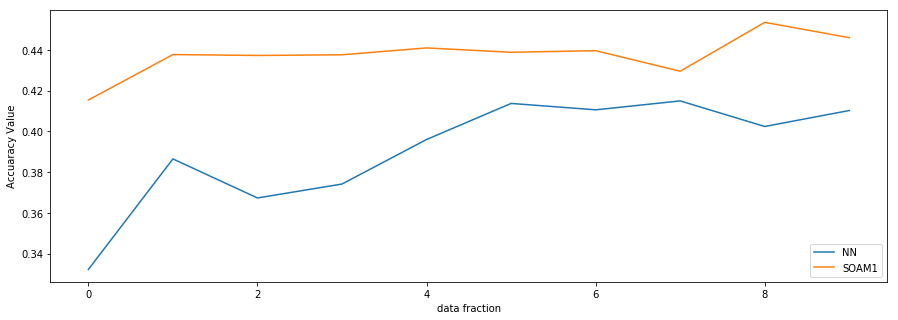

In [40]:
#output comparitive visualization
from matplotlib.pyplot import figure
plt.figure(figsize=(15, 5))
plt.plot(accuracy_list_NN,label='NN')
plt.plot(accuracy_list_SOAM1,label='SOAM1')
#plt.plot([10,20], accuracy_list_SOAM3,label='SOAM2')
plt.legend(loc='lower right')
plt.xlabel("data fraction")
plt.ylabel("Accuaracy Value")
